## Современные библиотеки градиентного бустинга

Ранее мы использовали наивную версию градиентного бустинга из scikit-learn, [придуманную](https://projecteuclid.org/download/pdf_1/euclid.aos/1013203451) в 1999 году Фридманом. С тех пор было предложено много реализаций, которые оказываются лучше на практике. На сегодняшний день популярны три библиотеки, реализующие градиентный бустинг:
* **XGBoost**. После выхода быстро набрала популярность и оставалась стандартом до конца 2016 года. Одними из основных особенностей имплементации были оптимизированность построения деревьев, а также различные регуляризации модели.
* **LightGBM**. Отличительной чертой является быстрота построения композиции. Например, используется следующий трюк для ускорения обучения: при построении вершины дерева вместо перебора по всем значениям признака производится перебор значений гистограммы этого признака. Таким образом, вместо $O(\ell)$ требуется $O(\text{#bins})$. Кроме того, в отличие от других библиотек, которые строят дерево по уровням, LightGBM использует стратегию best-first, т.е. на каждом шаге строит вершину, дающую наибольшее уменьшение функционала. Таким образом, каждое дерево является цепочкой с прикрепленными листьями.
* **CatBoost**. Библиотека от компании Яндекс. Позволяет автоматически обрабатывать категориальные признаки (даже если их значения представлены в виде строк). Кроме того, алгоритм является менее чувствительным к выбору конкретных гиперпараметров. За счёт этого уменьшается время, которое тратит человек на подбор оптимальных гиперпараметров.

### Основные параметры

(lightgbm/catboost)

* `objective` – функционал, на который будет настраиваться композиция
* `eta` / `learning_rate` – темп (скорость) обучения
* `num_iterations` / `n_estimators`  – число итераций бустинга

#### Параметры, отвечающие за сложность деревьев
* `max_depth` – максимальная глубина 
* `max_leaves` / num_leaves – максимальное число вершин в дереве
* `gamma` / `min_gain_to_split` – порог на уменьшение функции ошибки при расщеплении в дереве
* `min_data_in_leaf` – минимальное число объектов в листе
* `min_sum_hessian_in_leaf` – минимальная сумма весов объектов в листе, минимальное число объектов, при котором делается расщепление 
* `lambda` – коэффициент регуляризации (L2)
* `subsample` / `bagging_fraction` – какую часть объектов обучения использовать для построения одного дерева 
* `colsample_bytree` / `feature_fraction` – какую часть признаков использовать для построения одного дерева 

Подбор всех этих параметров — настоящее искусство. Но начать их настройку можно с самых главных параметров: `learning_rate` и `n_estimators`. Обычно один из них фиксируют, а оставшийся из этих двух параметров подбирают (например, фиксируют `n_estimators=1000` и подбирают `learning_rate`). Следующим по важности является `max_depth`. В силу того, что мы заинтересованы в неглубоких деревьях, обычно его перебирают из диапазона [3; 7].

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)

In [ ]:
# !pip install catboost
# !pip install lightgbm
# !pip install xgboost

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.05, class_sep=0.8, random_state=241)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=241)

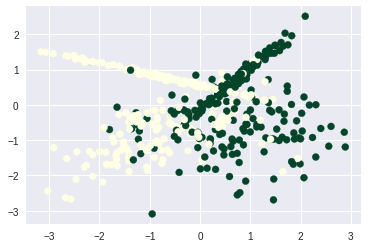

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='YlGn');

## Catboost

In [ ]:
from catboost import CatBoostClassifier
??CatBoostClassifier

#### Задание 1. 
- Обучите CatBoostClassifier с дефолтными параметрами, используя 300 деревьев. 
- Нарисуйте decision boundary
- Посчитайте roc_auc_score

0.9196301564722617


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


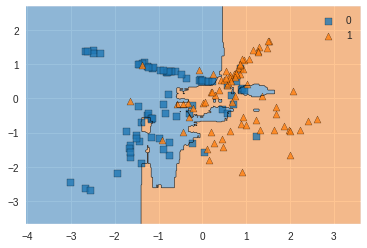

In [ ]:
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(1,1)
clf = CatBoostClassifier(iterations=200, logging_level='Silent')
clf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf, ax=ax)
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

In [ ]:
y_test_pred = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_test_pred)

0.9196301564722617

### Learning rate

Default is 0.03

#### Задание 2. 
- Обучите CatBoostClassifier с разными значениями `learning_rate`. 
- Посчитайте roc_auc_score на тестовой и тренировочной выборках
- Написуйте график зависимости roc_auc от скорости обучения (learning_rate)

learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease l

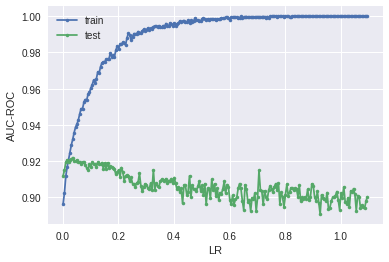

In [ ]:
lrs = np.arange(0.001, 1.1, 0.005)
quals_train = [] # to store roc auc on trian
quals_test = [] # to store roc auc on test

for l in lrs:
  clf = CatBoostClassifier(iterations=150, logging_level='Silent',
                           learning_rate=l)
  clf.fit(X_train, y_train)
  q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]) 
  q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
  quals_train.append(q_train)
  quals_test.append(q_test)
    # YOUR CODE HERE

plt.plot(lrs, quals_train, marker='.', label='train')
plt.plot(lrs, quals_test, marker='.', label='test')
plt.xlabel('LR')
plt.ylabel('AUC-ROC')
plt.legend()
# YOUR CODE HERE (make the plot)

### Number of trees

Важно также подобрать количество деревьев

#### Задание 3. 
- Обучите CatBoostClassifier с разными значениями `iterations`. 
- Посчитайте roc_auc_score на тестовой и тренировочной выборках
- Написуйте график зависимости roc_auc от размера копозиции

1 loop, best of 5: 3.2 s per loop


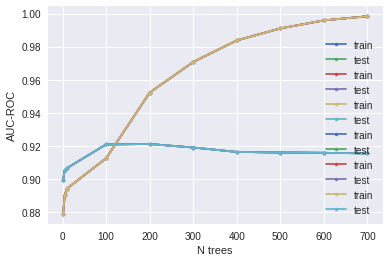

In [ ]:
%%timeit 
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
  clf = CatBoostClassifier(iterations=n, logging_level='Silent', learning_rate=0.02)
  clf.fit(X_train, y_train)
  q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]) 
  q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  quals_train.append(q_train)
  quals_test.append(q_test)
    # YOUR CODE HERE

plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('N trees')
plt.ylabel('AUC-ROC')
plt.legend()

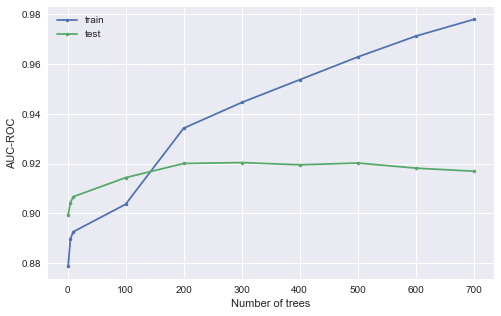

In [ ]:
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

### Staged prediction

Как сделать то же самое, но быстрее. Для этого в библиотеке CatBoost есть метод `staged_predict_proba`

In [ ]:
%%timeit

# train the model with max trees
clf = CatBoostClassifier(iterations=700, 
                         logging_level='Silent',
                         learning_rate = 0.01)
clf.fit(X_train, y_train)

# obtain staged predictiond on test
predictions_test = clf.staged_predict_proba(
    data=X_test,
    ntree_start=0, 
    ntree_end=700, 
    eval_period=25
)

# obtain staged predictiond on train
predictions_train = clf.staged_predict_proba(
    data=X_train,
    ntree_start=0, 
    ntree_end=700, 
    eval_period=25
)

# calculate roc_auc
quals_train = []
quals_test = []
n_trees = []
for iteration, (test_pred, train_pred) in enumerate(zip(predictions_test, predictions_train)):
    n_trees.append((iteration+1)*25)
    quals_test.append(roc_auc_score(y_test, test_pred[:, 1]))
    quals_train.append(roc_auc_score(y_train, train_pred[:, 1]))

1 loop, best of 5: 820 ms per loop


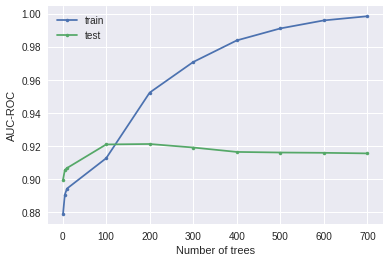

In [ ]:
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

plt.show()

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
??LGBMClassifier

#### Задание 4. 
- Обучите LGBMClassifier с дефолтными параметрами, используя 300 деревьев. 
- Нарисуйте decision boundary
- Посчитайте roc_auc_score

0.8668207681365576


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


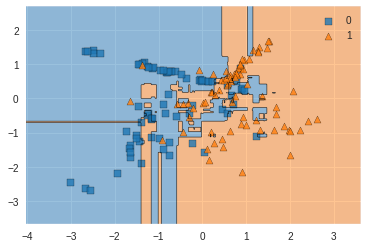

In [ ]:
clf = LGBMClassifier(n_estimators=200)
clf.fit(X_train, y_train)
plot_decision_regions(X_test, y_test, clf)
print(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

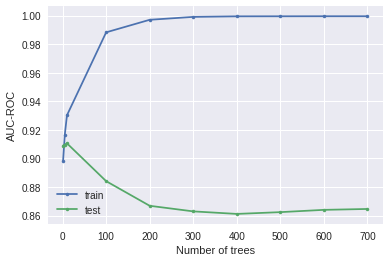

In [ ]:
n_trees = [1, 5, 10, 100, 200, 300, 400, 500, 600, 700]
quals_train = []
quals_test = []
for n in n_trees:
    clf = LGBMClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    q_test = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    
plt.plot(n_trees, quals_train, marker='.', label='train')
plt.plot(n_trees, quals_test, marker='.', label='test')
plt.xlabel('Number of trees')
plt.ylabel('AUC-ROC')
plt.legend()

Теперь попробуем взять фиксированное количество деревьев, но будем менять максимальнyю глубину

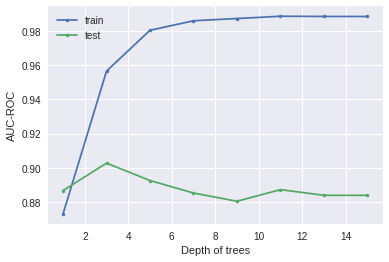

In [ ]:
depth = list(range(1, 17, 2))
quals_train = []
quals_test = []
for d in depth:
    lgb = LGBMClassifier(n_estimators=100, max_depth=d)
    lgb.fit(X_train, y_train)
    q_train = roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1])
    q_test = roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1])
    quals_train.append(q_train)
    quals_test.append(q_test)
    
plt.plot(depth, quals_train, marker='.', label='train')
plt.plot(depth, quals_test, marker='.', label='test')
plt.xlabel('Depth of trees')
plt.ylabel('AUC-ROC')
plt.legend()

И сравним с Catboost:

#### Задание 5. 
- Обучите CatBoostClassifier с разной глубиной
- Посчитайте roc_auc_score, 
- Сравните лучший результат с LGBM

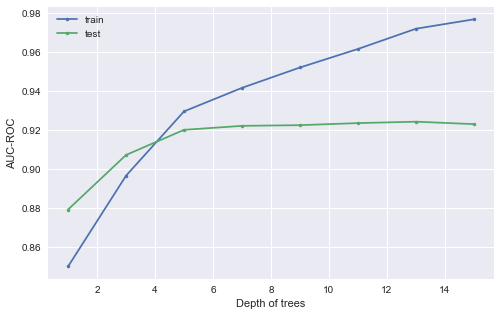

In [ ]:
depth = list(range(1, 17, 2))

quals_train = []
quals_test = []



Теперь, когда у нас получились отличные модели, нужно их сохранить!

In [ ]:
clf = CatBoostClassifier(n_estimators=200, learning_rate=0.01, 
                         max_depth=5, logging_level="Silent")
clf.fit(X_train, y_train)
clf.save_model('catboost.cbm', format='cbm');

In [ ]:
lgb = LGBMClassifier(n_estimators=100, max_depth=3)
lgb.fit(X_train, y_train)
lgb.booster_.save_model('lightgbm.txt')

И загрузим обратно, когда понадобится их применить

In [ ]:
lgb = LGBMClassifier(model_file='lightgbm.txt')

clf = clf.load_model('catboost.cbm')

## Блендинг и Стекинг

Блендинг представляет из себя "мета-алгоритм", предсказание которого строится как взвешенная сумма базовых алгоритмов. 

Рассмотрим простой пример блендинга бустинга и линейной регрессии.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### Задание 6. 
- Обучите CatBoostRegressor со следующими гиперпараметрами:
`iterations=100, max_depth=4, learning_rate=0.01, loss_function='RMSE'`
- Посчитайте предсказание и RMSE на тестовой и тренировочной выборках

In [ ]:
from catboost import CatBoostRegressor
cbm = CatBoostRegressor(iterations=100, max_depth=5, learning_rate=0.02,
                        loss_function='RMSE', logging_level='Silent')
cbm.fit(X_train, y_train)

y_pred_cbm = cbm.predict(X_test)
y_train_pred_cbm = cbm.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred_cbm))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_cbm))

Train RMSE = 14.8901
Test RMSE = 25.2513


#### Задание 7. 
- Отмасштабируйте данные (StandardScaler) и обучите линейную регрессию
- Посчитайте предсказание и RMSE на тестовой и тренировочной выборках

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_lr))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_lr))

Train RMSE = 19.4597
Test RMSE = 29.3266


#### Блендинг

Будем считать, что новый алгоритм $a(x)$ представим как
$$
    a(x)
    =
    \sum_{n = 1}^{N}
    w_n b_n(x),
$$
где $\sum\limits_{n=1}^N w_n =1$

Нам нужно обучить линейную регрессию на предсказаниях двух обченных выше алгоритмов

#### Задание 8. 


In [ ]:
predictions_train = pd.DataFrame([y_train_lr, y_train_pred_cbm]).T
predictions_test =  pd.DataFrame([y_pred_lr, y_pred_cbm]).T

lr_blend = LinearRegression()
lr_blend.fit(predictions_train, y_train)

y_pred_blend = lr_blend.predict(predictions_test)
y_train_blend = lr_blend.predict(predictions_train)

print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_blend))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_blend))

Train RMSE = 8.8826
Test RMSE = 15.7705


#### Стекинг

Теперь обучим более сложную функцию композиции

$$
 a(x) = f(b_1(x), b_2(x))
$$

где $f()$ это обученная модель градиентного бустинга

#### Задание 9. 


In [ ]:
from lightgbm import LGBMRegressor

lgb_stack = LGBMRegressor(n_estimators=100, max_depth=2)
lgb_stack.fit(predictions_train, y_train)

y_pred_stack = lgb_stack.predict(predictions_test)
mean_squared_error(y_test, y_pred_stack)

15.438996639074093

В итоге получаем качество на тестовой выборке лучше, чем у каждого алгоритма в отдельности.

Полезные ссылки:

* [Видео про стекинг](https://www.coursera.org/lecture/competitive-data-science/stacking-Qdtt6)

## XGBoost

In [ ]:
# based on https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV  
from sklearn import metrics

In [ ]:
titanic = pd.read_csv('titanic.csv')

In [ ]:
X = titanic[['Pclass', 'Age', 'SibSp', 'Fare']]
y = titanic.Survived.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((712, 4), (712,), (179, 4), (179,))

In [ ]:
from xgboost.sklearn import XGBClassifier
??XGBClassifier

Init signature:
XGBClassifier(
    *,
    objective='binary:logistic',
    use_label_encoder=True,
    **kwargs,
)
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.
    use_label_encoder : bool
        (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new code,
        we recommend that you set this parameter to False.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify 

In [ ]:
def modelfit(alg, dtrain, y, X_test=None, y_test=None, test=True):    

    #Fit the algorithm on the data
    alg.fit(dtrain, y, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy (Train): %.4g" % metrics.accuracy_score(y, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
    if test:
        dtest_predictions = alg.predict(X_test)
        dtest_predprob = alg.predict_proba(X_test)[:,1]
        print ("Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, dtest_predictions))
        print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, dtest_predprob))
    # plot feature importance          
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

These parameters are used to define the optimization objective the metric to be calculated at each step.


<table><tr>
<td> <img src="https://github.com/AKuzina/ml_dpo/blob/main/practicals/xgb.png?raw=1" alt="Drawing" style="width: 700px;"/> </td>
</tr></table>

In [ ]:
xgb1 = XGBClassifier(objective='binary:logistic',
                     eval_metric='auc',
                     learning_rate =0.1, 
                     n_estimators=1000,
                     booster='gbtree',
                     seed=27)

/Users/annakuzina/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Model Report
Accuracy (Train): 0.9551
AUC Score (Train): 0.994147
Accuracy (Test): 0.6816
AUC Score (Test): 0.750193


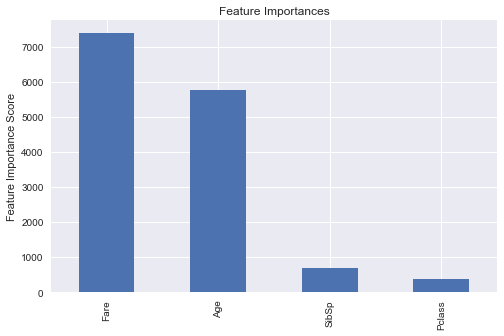

In [ ]:
modelfit(xgb1, X_train, y_train, X_test, y_test)

#### Задание 10. 
- Задайте сетку для перечисленных ниже параметров

`max_depth` - Maximum tree depth for base learners.

`gamma`  - Minimum loss reduction required to make a further partition on a leaf node of the tree.

`subsample` -  Subsample ratio of the training instance.

`colsample_bytree` - Subsample ratio of columns when constructing each tree.

`reg_alpha` - L1 regularization term on weights

- Запустите поиск, используя `GridSearchCV` c 5 фолдами. Используйте смесь из 100 деревьев.

In [ ]:
param_grid = {
# YOUR CODE HERE
}

gsearch1 = # YOUR CODE HERE

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    5.0s
[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:   19.0s
[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:   46.9s
[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 720 out of 720 | elapsed:  1.6min finished
/Users/annakuzina/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='auc',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_...=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=27,
                     

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

({'colsample_bytree': 1,
  'gamma': 0.2,
  'max_depth': 2,
  'reg_alpha': 1,
  'subsample': 1},
 0.7427453595741172)

Теперь можем взять больше деревьев, но меньше lr


Model Report
Accuracy (Train): 0.736
AUC Score (Train): 0.805953
Accuracy (Test): 0.7318
AUC Score (Test): 0.822458


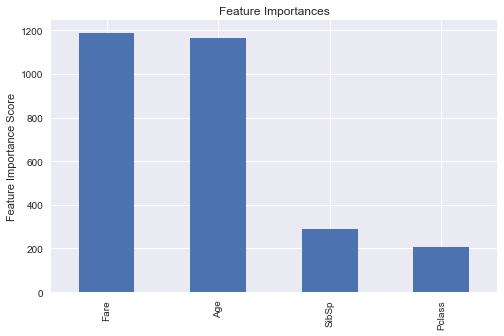

In [ ]:
xgb_best = XGBClassifier(objective='binary:logistic',
                         eval_metric='auc',
                         learning_rate =0.01, 
                         n_estimators=1000,
                         booster='gbtree',
                         seed=27,
                         max_depth = gsearch1.best_params_['max_depth'],
                         gamma = gsearch1.best_params_['gamma'], 
                         subsample = gsearch1.best_params_['subsample'],
                         colsample_bytree = gsearch1.best_params_['colsample_bytree'],
                         reg_alpha = gsearch1.best_params_['reg_alpha']
                        )
modelfit(xgb_best, X_train, y_train, X_test, y_test)

## Важность признаков

В курсе мы подробно обсуждаем, как добиваться хорошего качества решения задачи: имея выборку $X, y$, построить алгоритм с наименьшей ошибкой. Однако заказчику часто важно понимать, как работает алгоритм, почему он делает такие предсказания. Обсудим несколько мотиваций.
	
#### Доверие алгоритму
Например, в банках на основе решений, принятых алгоритмом, выполняются финансовые операции, и менеджер, ответственный за эти операции, будет готов использовать алгоритм, только если он понимает, что его решения обоснованы. По этой причине в банках очень часто используют простые линейные алгоритмы. Другой пример из области медицины: поскольку цена ошибки может быть очень велика, врачи готовы использовать только интерпретируемые алгоритмы.
	
#### Отсутствие дискриминации (fairness) 
Вновь пример с банком: алгоритм кредитного скоринга не должен учитывать расовую принадлежность (racial bias) заемщика или его пол (gender bias). Между тем, такие зависимости часто могут присутствовать в датасете (исторические данные), на котором обучался алгоритм.  Еще один пример: известно, что нейросетевые векторы слов содержат gender bias. Если эти вектора использовались при построении системы поиска по резюме для рекрутера, то, например, по запросу `technical skill` он может видеть женские резюме в конце ранжированного списка.
	
#### Учет контекста
Данные, на которых обучается алгоритм, не отображают всю предметную область. Интерпретация алгоритма позволит оценить, насколько найденные зависимости связаны с реальной жизнью. Если предсказания интерпретируемы, это также говорит о высокой обобщающей способности алгоритма. 

Теперь обсудим несколько вариантов, как можно оценивать важность признаков.

### Веса линейной модели

Самый простой способ, который уже был рассмотрен на семинаре про линейные модели: после построения модели каждому признаку будет соответствовать свой вес - если признаки масштабированы, то чем он больше по модулю, тем важнее признак, а знак будет говорить о положительном или отрицательном влиянии на величину целевой переменной.

In [ ]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

data = load_boston()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### FSTR (Feature strength)

[Fstr](https://catboost.ai/docs/concepts/fstr.html) говорит, что важность признака &mdash; это то, насколько в среднем меняется ответ модели при изменении значения данного признака (изменении значения разбиения).

Рассчитать его можно так:

$$feature\_importance_{F} = \sum_{tree, leaves_F} (v_1 - avr)^2\cdot c_1 +(v_2 - avr)^2\cdot c_2 = \left(v_1 - v_2\right)^2\frac{c_1c_2}{c_1 + c_2}\\
\qquad avr = \frac{v_1 \cdot c_1 + v_2 \cdot c_2}{c_1 + c_2}.$$

Мы сравниваем листы, отличающиеся значением сплита в узле на пути к ним: если условие сплита выполняется, объект попадает в левое поддерево, иначе &mdash; в правое. 

$c_1, c_2$ - число объектов обучающего датасета, попавших в левое и правое поддерево соответственно, либо суммарный вес этих объектов, если используются веса; $v_1, v_2$ - значение модели в левом и правом поддереве (например, среднее)


Далее значения $feature\_importance$ нормируются, и получаются величины, которые суммируются в 100.

In [ ]:
clf = CatBoostClassifier(n_estimators=200, learning_rate=0.01, 
                         max_depth=5, logging_level="Silent")

# load the trained catboost model
clf = clf.load_model('catboost.cbm')

In [ ]:
for val, name in sorted(zip(cbm.feature_importances_, data.feature_names))[::-1]:
    print(name, val)

LSTAT 44.57842395824728
RM 36.850858175652654
NOX 3.473133901367306
PTRATIO 3.3887271637105134
DIS 2.23667053074621
INDUS 1.9016830079470277
TAX 1.7781003730136429
CRIM 1.5774334311195715
AGE 1.4213295189456003
RAD 1.3943420902109485
B 0.6521915521536685
CHAS 0.6057385942178969
ZN 0.14136770266764145


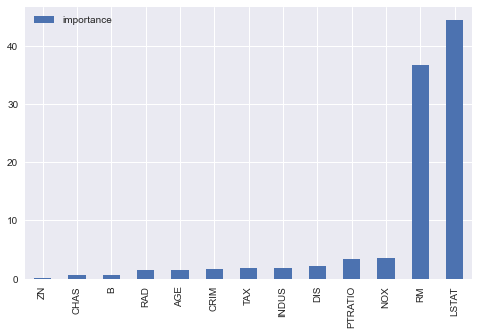

In [ ]:
feature_importances = pd.DataFrame({'importance':cbm.feature_importances_}, index=data.feature_names)
feature_importances.sort_values('importance').plot.bar();

In [ ]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Impurity-based feature importances

Важность признака рассчитывается как (нормированное) общее снижение критерия информативности за счет этого признака.

Приведем простейший пример, как можно получить такую оценку в sklearn-реализации RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, oob_score=True)
clf.fit(X_train, y_train)

clf.feature_importances_

array([0.0347918 , 0.00057852, 0.00634385, 0.00144822, 0.02079838,
       0.39185139, 0.01321998, 0.06027615, 0.00416488, 0.01309993,
       0.01469631, 0.01288812, 0.42584248])

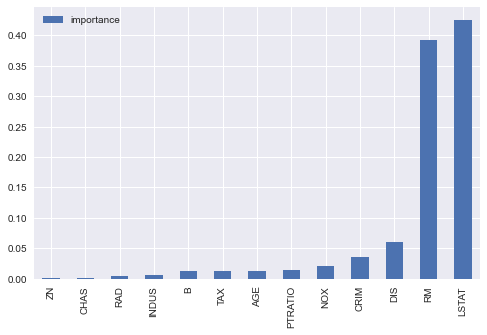

In [ ]:
feature_importances = pd.DataFrame({'importance':clf.feature_importances_}, index=X_train.columns)
feature_importances.sort_values('importance').plot.bar();